In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Kerakli dataframni chaqirib olamiz

In [2]:
# Online datasets joylashgan manzilni korsatamiz
url = 'https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true'
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts() # tarorlanmas qiymatlarni ko`rish

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe() # df haqida umumiy malumot

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


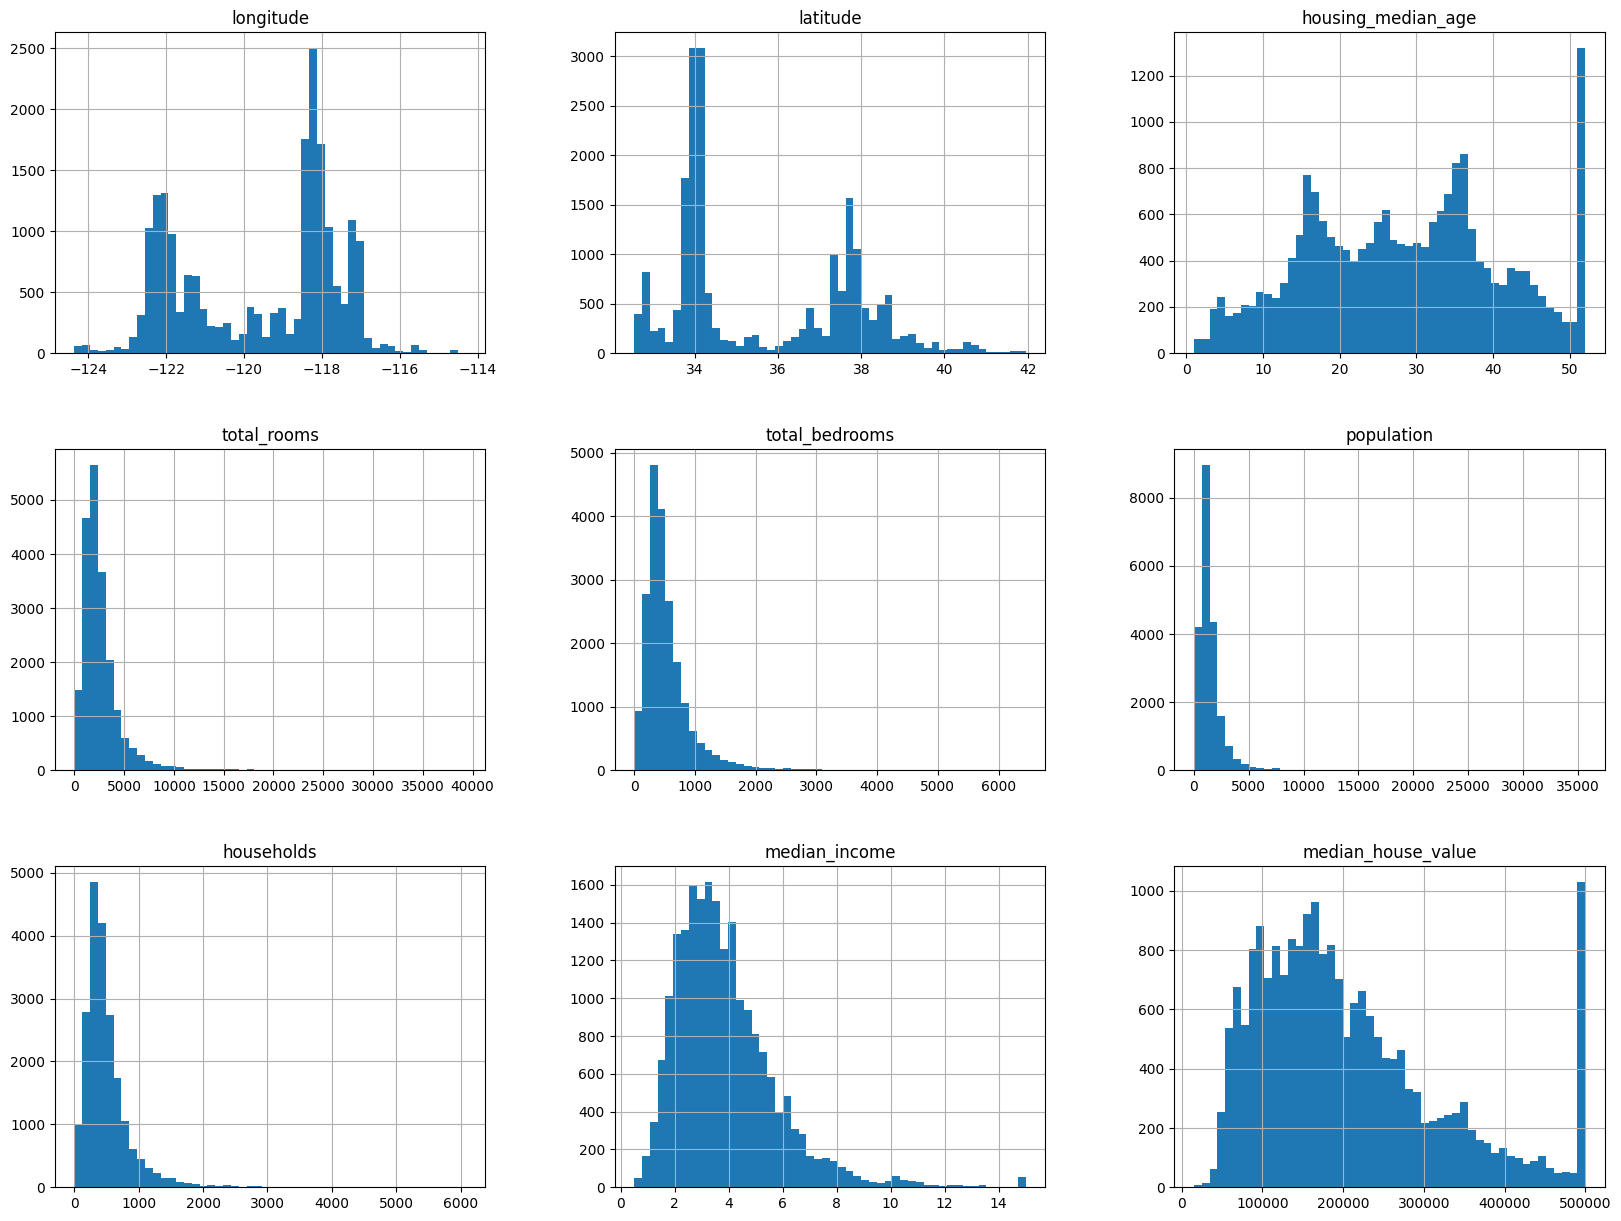

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15)) # vizual korinishda chiqarish
plt.show()

### Dataframni test va traning setlarga bolsh uchun ishlatiladi

In [8]:
from sklearn.model_selection import train_test_split
# random_state ni har doim qoshimiz kerak malumotlarni defaul qilish uchun
train_set, test_set = train_test_split(df, test_size=0.2, random_state=45) # train va test setlarga boldik 

In [9]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,191700.0,INLAND
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,114300.0,INLAND
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,144600.0,INLAND
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,157300.0,NEAR OCEAN
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,61500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16547,-121.22,37.81,20.0,1811.0,352.0,1191.0,327.0,4.0125,121500.0,INLAND
16317,-121.32,38.00,22.0,2105.0,521.0,781.0,483.0,2.2130,87500.0,INLAND
12895,-121.33,38.65,24.0,3533.0,741.0,1496.0,723.0,2.8106,183200.0,INLAND
6012,-117.78,34.07,18.0,3610.0,772.0,2899.0,765.0,3.9784,113500.0,INLAND


In [10]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3046,-119.28,35.50,34.0,1923.0,379.0,1101.0,351.0,2.4044,65800.0,INLAND
6803,-118.13,34.08,40.0,1931.0,449.0,1367.0,446.0,2.5750,228400.0,<1H OCEAN
10112,-117.94,33.94,30.0,1596.0,307.0,845.0,309.0,4.5096,241100.0,<1H OCEAN
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
5008,-118.33,34.01,47.0,1320.0,259.0,653.0,291.0,3.7727,193000.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15021,-117.03,32.79,17.0,7352.0,1699.0,3331.0,1634.0,2.7006,166300.0,<1H OCEAN
6658,-118.12,34.15,22.0,1671.0,480.0,1005.0,443.0,3.0119,171400.0,<1H OCEAN
18945,-122.03,38.28,15.0,5114.0,833.0,2418.0,778.0,4.4882,144000.0,INLAND
2499,-120.39,36.78,11.0,1947.0,488.0,2104.0,486.0,1.7184,55200.0,INLAND


### malumotlarni bolganimizda traning va test setlarda malumotlarni ogib ketmasligini tamilashimiz uchun kerak boladi

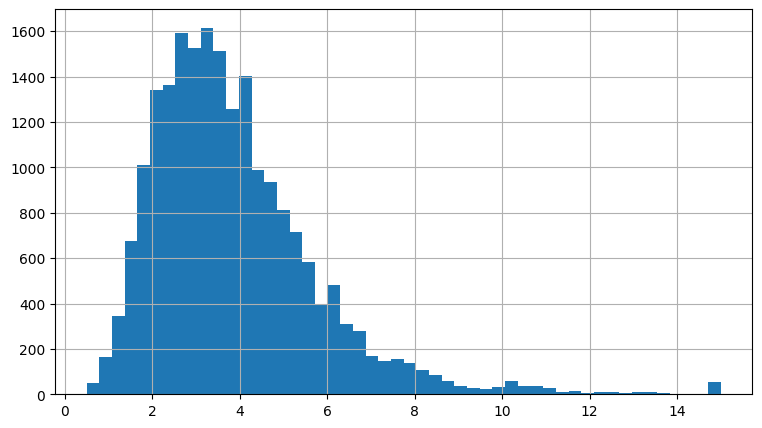

In [11]:
df['median_income'].hist(bins=50, figsize=(9,5))
plt.show()

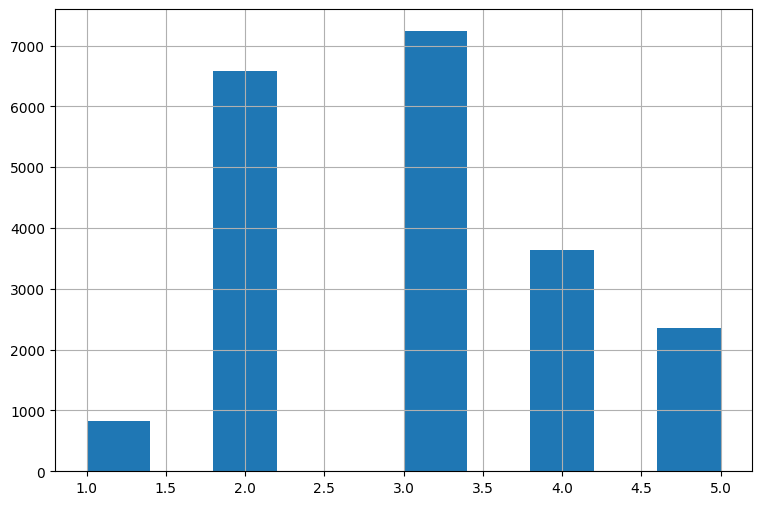

In [12]:
# kategoriyalarga ajratish uchun
df['income_cat'] = pd.cut(df['median_income'], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [13]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
4281,-118.32,34.09,27.0,210.0,98.0,332.0,112.0,2.5556,175000.0,<1H OCEAN,2
3018,-119.45,35.07,45.0,973.0,183.0,500.0,177.0,2.6389,30000.0,INLAND,2
10704,-117.71,33.60,25.0,3011.0,714.0,893.0,654.0,2.3387,74800.0,<1H OCEAN,2
4212,-118.26,34.11,52.0,1740.0,402.0,749.0,335.0,3.5673,270700.0,<1H OCEAN,3
18776,-122.27,40.46,14.0,2633.0,530.0,1324.0,513.0,2.2768,78600.0,INLAND,2


In [14]:
# indexlari orqali yangi train va test datafremlar yaratildi 
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45)
for train_index, test_index in stratified_split.split(df, df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [15]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,500001.0,NEAR OCEAN,5
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,191000.0,NEAR BAY,4
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,175900.0,<1H OCEAN,3
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,312700.0,<1H OCEAN,3
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,127600.0,NEAR OCEAN,4
...,...,...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,65500.0,INLAND,2
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,300600.0,INLAND,3
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,500001.0,<1H OCEAN,5
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,140100.0,<1H OCEAN,3


In [16]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
2252,-119.83,36.80,24.0,3756.0,681.0,1586.0,739.0,3.8571,90100.0,INLAND,3
12454,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,INLAND,2
17358,-120.43,34.87,26.0,1699.0,272.0,799.0,266.0,3.9871,157700.0,<1H OCEAN,3
5564,-118.29,33.91,41.0,2475.0,532.0,1416.0,470.0,3.8372,156400.0,<1H OCEAN,3
8973,-118.41,34.00,37.0,1426.0,259.0,689.0,261.0,5.5284,331000.0,<1H OCEAN,4
...,...,...,...,...,...,...,...,...,...,...,...
671,-122.16,37.70,36.0,1097.0,208.0,568.0,225.0,2.9917,194600.0,NEAR BAY,2
17068,-122.24,37.55,3.0,6164.0,1175.0,2198.0,975.0,6.7413,435900.0,NEAR BAY,5
4443,-118.21,34.09,37.0,1822.0,498.0,1961.0,506.0,1.9881,159200.0,<1H OCEAN,2
12070,-117.60,33.85,9.0,6538.0,955.0,2928.0,892.0,5.3006,221400.0,<1H OCEAN,4


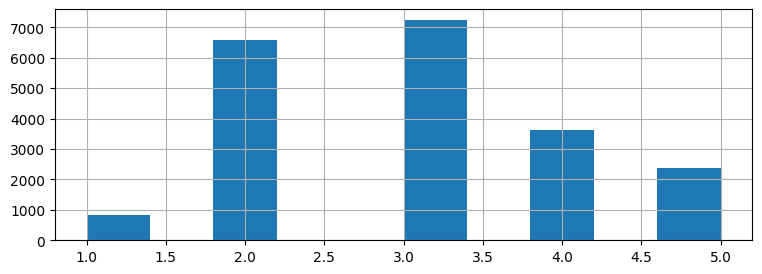

In [17]:
df['income_cat'].hist(figsize=(9,3))
plt.show()

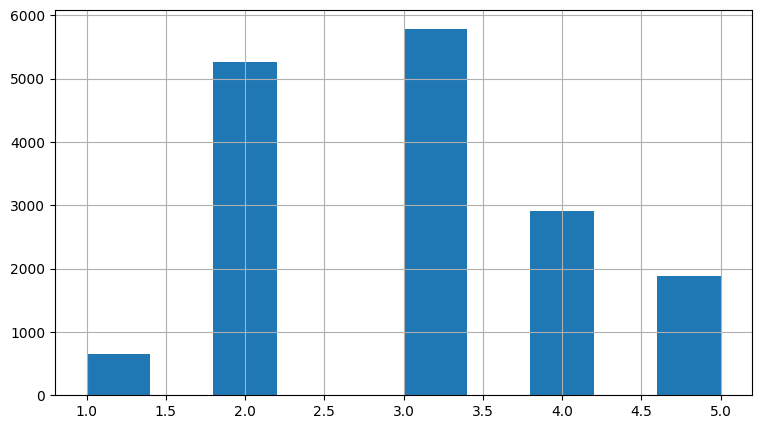

In [18]:
strat_train_set['income_cat'].hist(figsize=(9,5))
plt.show()

In [19]:
strat_train_set.drop(['income_cat'], axis=1, inplace=True)
strat_test_set.drop(['income_cat'], axis=1, inplace=True)

In [20]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,500001.0,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,191000.0,NEAR BAY
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,175900.0,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,312700.0,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,127600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,65500.0,INLAND
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,300600.0,INLAND
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,500001.0,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,140100.0,<1H OCEAN


In [21]:
housing = strat_train_set.copy() # yangi dataframga nushasini kochirib olyapmiz
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16908,-122.37,37.58,34.0,2697.0,313.0,810.0,279.0,12.4291,500001.0,NEAR OCEAN
634,-122.16,37.71,37.0,1507.0,242.0,632.0,253.0,4.5553,191000.0,NEAR BAY
10909,-117.86,33.74,32.0,691.0,151.0,926.0,148.0,4.1250,175900.0,<1H OCEAN
3736,-118.40,34.18,32.0,3724.0,899.0,1912.0,791.0,3.5711,312700.0,<1H OCEAN
14749,-117.05,32.57,22.0,2857.0,516.0,2412.0,496.0,4.7337,127600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,65500.0,INLAND
1941,-120.97,38.65,9.0,3707.0,602.0,1601.0,555.0,4.0714,300600.0,INLAND
955,-121.93,37.66,24.0,3166.0,424.0,1081.0,400.0,8.3337,500001.0,<1H OCEAN
6107,-117.90,34.11,37.0,1286.0,255.0,1047.0,249.0,4.2019,140100.0,<1H OCEAN


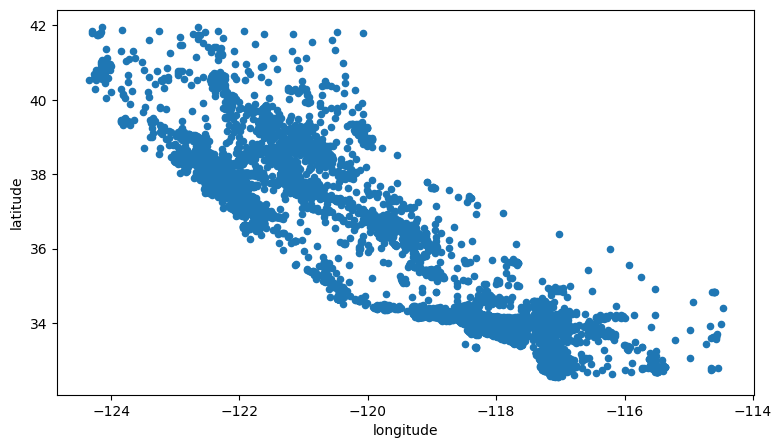

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(9,5))
plt.show()

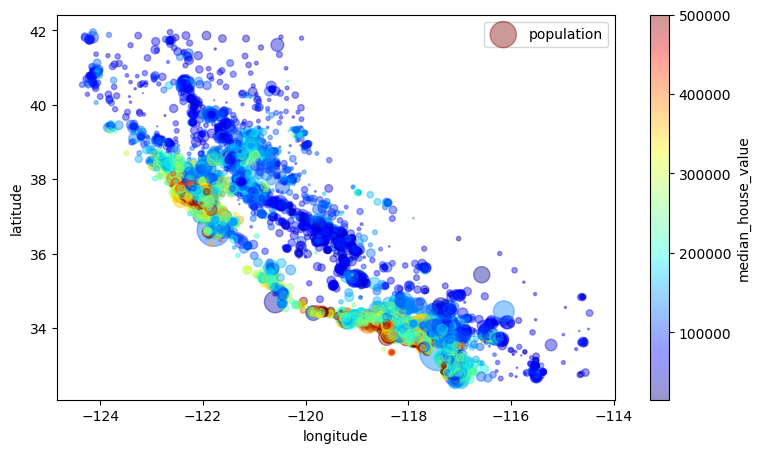

In [23]:
housing.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    alpha=0.4,
    s=housing['population']/50, # nuqta radiusi aholi soniga qarab o`zgaradi
    label='population',
    c='median_house_value', # nuqta rangi uyning median narxiga qarab o`zgaradi
    cmap='jet', # ranglar . Kok - daromadi kam,  qizil - aromadi ko`p
    colorbar=True,
    figsize=(9,5)
)
plt.show()

In [24]:
# koreliyatsiya yani bog`liqliklarni korishimiz munkun
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

<ipython-input-24-a3ff79fdc6f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['median_house_value']).sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688185
total_rooms           0.134346
housing_median_age    0.107314
households            0.067504
total_bedrooms        0.051329
population           -0.024739
longitude            -0.042491
latitude             -0.146351
dtype: float64

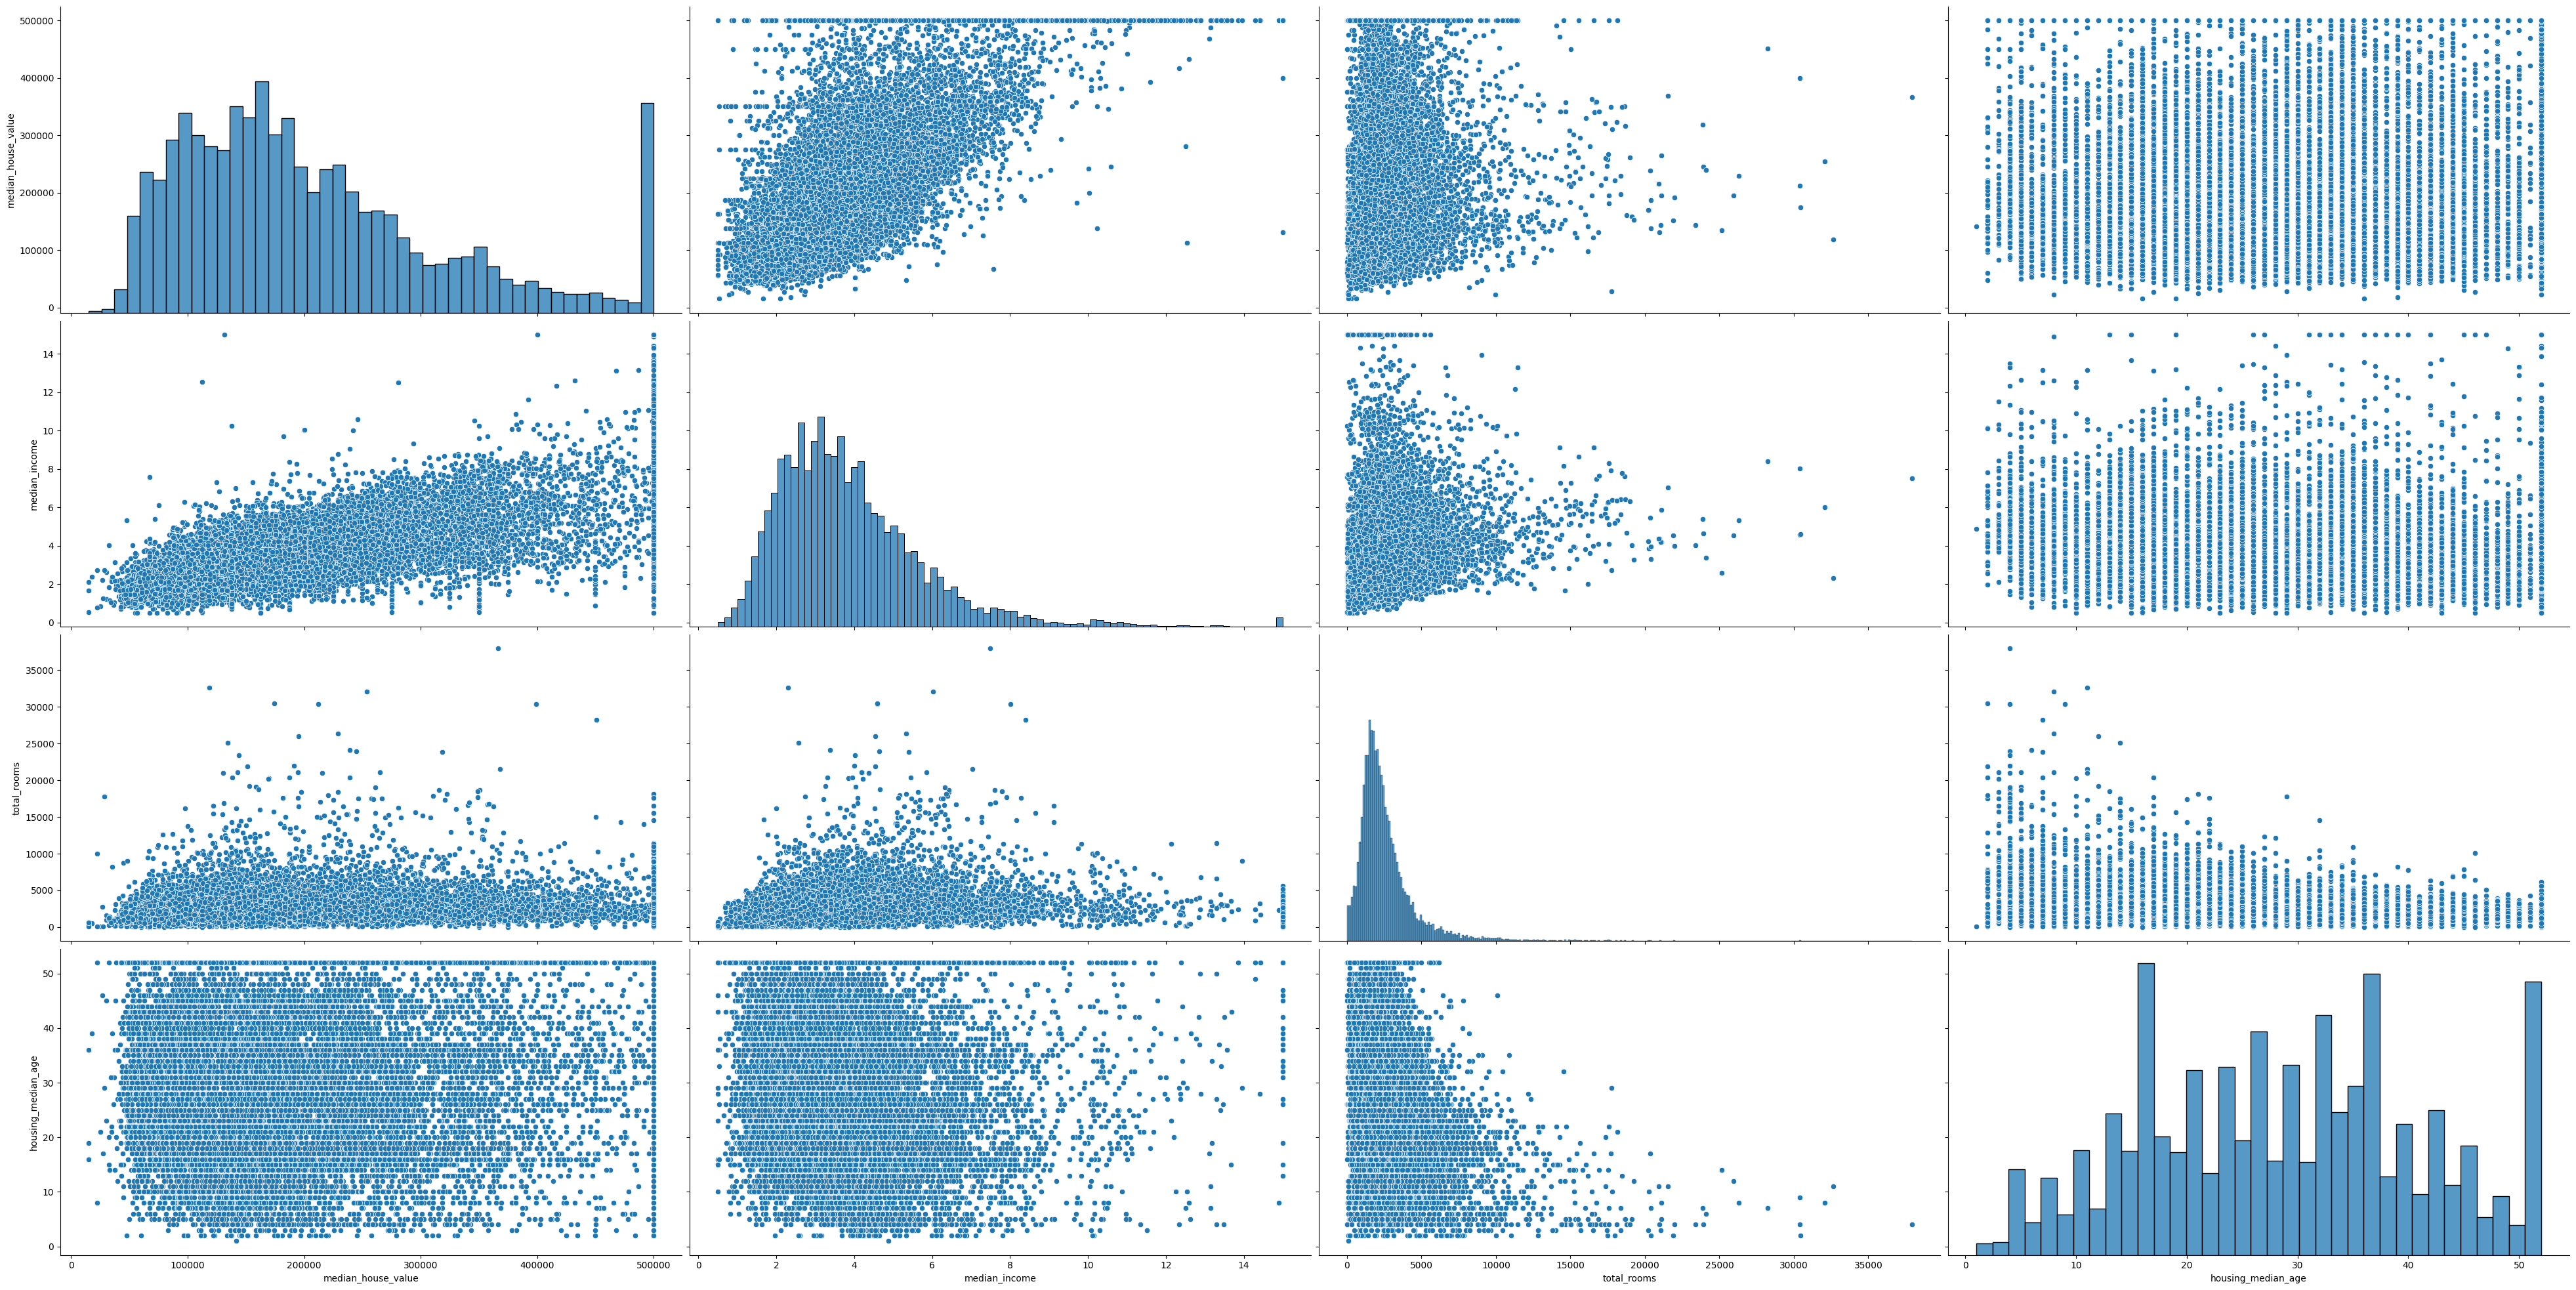

In [25]:
# koreliyatsiyani grafik korinishda tahlil qilish
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns,sns.pairplot(housing[cols], height=5, aspect=2)
plt.show()

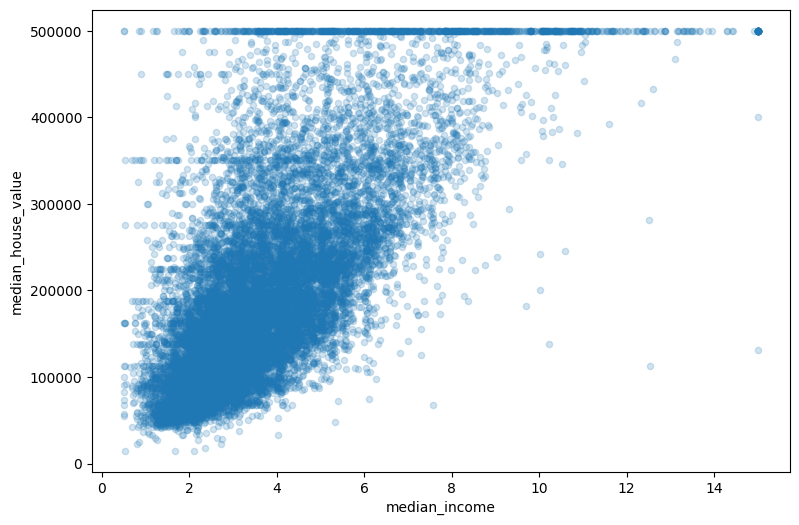

In [26]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(9,6))
plt.show()

In [27]:
# koreliyatsiya yani bog`liqliklarni korishimiz munkun
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

<ipython-input-27-a3ff79fdc6f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['median_house_value']).sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688185
total_rooms           0.134346
housing_median_age    0.107314
households            0.067504
total_bedrooms        0.051329
population           -0.024739
longitude            -0.042491
latitude             -0.146351
dtype: float64

In [28]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [29]:
# koreliyatsiya yani bog`liqliklarni korishimiz munkun
housing.corrwith(housing['median_house_value']).sort_values(ascending=False)

<ipython-input-29-a3ff79fdc6f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['median_house_value']).sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688185
rooms_per_household         0.145220
total_rooms                 0.134346
housing_median_age          0.107314
households                  0.067504
total_bedrooms              0.051329
population_per_household   -0.020015
population                 -0.024739
longitude                  -0.042491
latitude                   -0.146351
bedrooms_per_room          -0.254117
dtype: float64

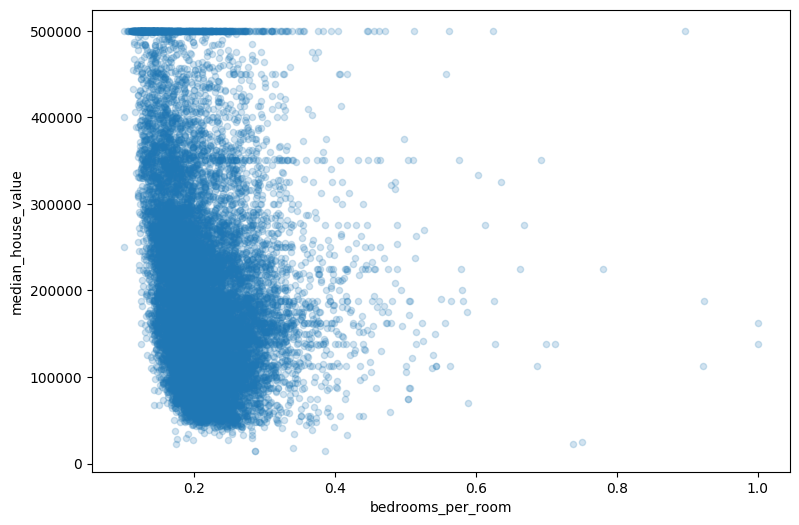

In [30]:
housing.plot(kind='scatter', x='bedrooms_per_room', y='median_house_value', alpha=0.2, figsize=(9,6))
plt.show()